In [23]:
import sys
import os
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(src))
from src.probabilistic_events import ProbabilisticEvent
from src.visualization import plot_distribution, plot_utility_distribution, plot_utility_distribution_decision, plot_probability_distribution
from src.decisions import Decision
from src.outcomes import Outcome
from src.decision_evaluation import evaluate_decision
import numpy as np
import time

In [24]:
start_time = time.time()

# Step 1: Define and visualize individual probabilistic events

## E1: Friend1 comes

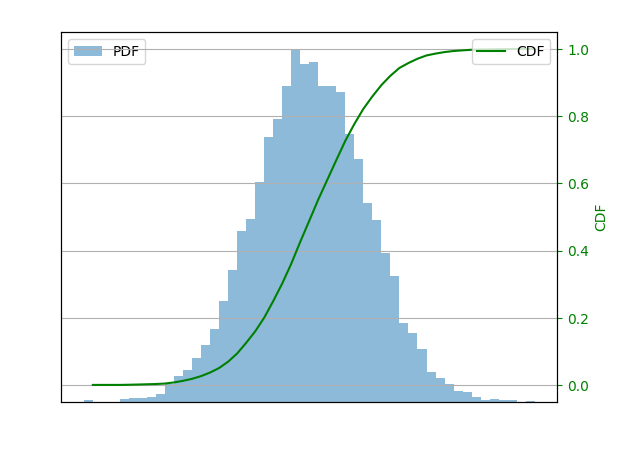

In [25]:
E1 = ProbabilisticEvent("E1", "normal", {'mean': 0.3, 'std': 0.1})
plot_probability_distribution(E1.sample(), "Probability of E1 occuring")

## NE1: Friend1 doesn't come

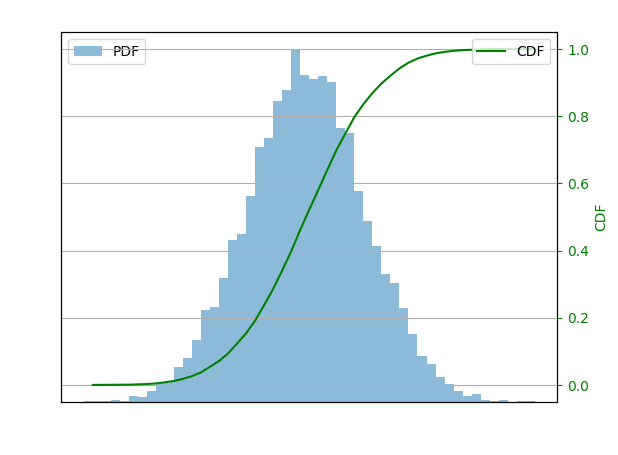

In [26]:
NE1= E1.complementary_event()
plot_probability_distribution(NE1.sample(), "Probability of NE1")

## Event 2: Friend 2 comes

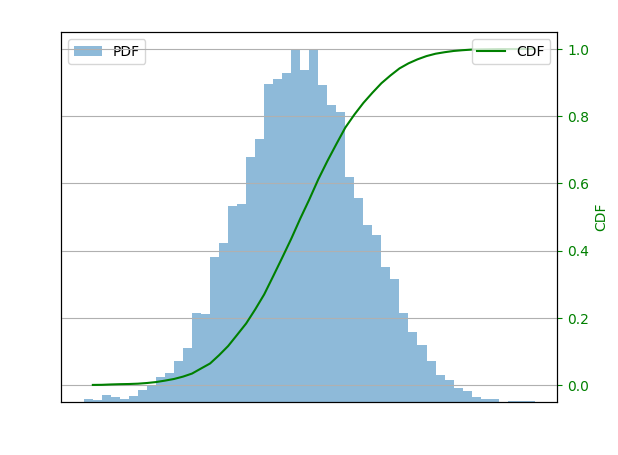

In [27]:
E2 = ProbabilisticEvent("E2", "normal", {'mean': 0.6, 'std': 0.1})
plot_probability_distribution(E2.sample(), "Probability of E2 occuring")

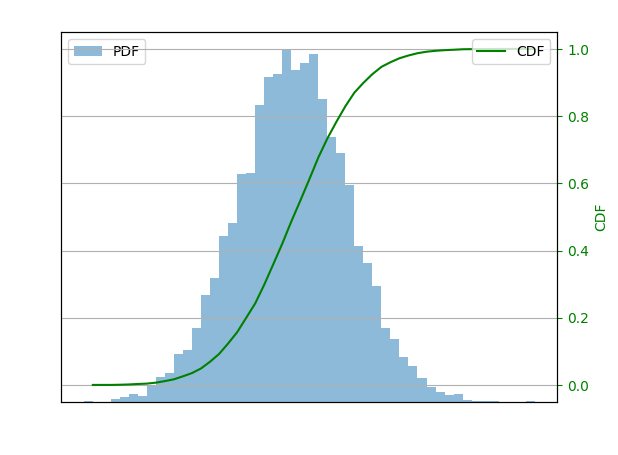

In [28]:
NE2 = E2.complementary_event()
plot_probability_distribution(NE2.sample(), "Probability of event 2 not occuring")

## Event 3: Me coming

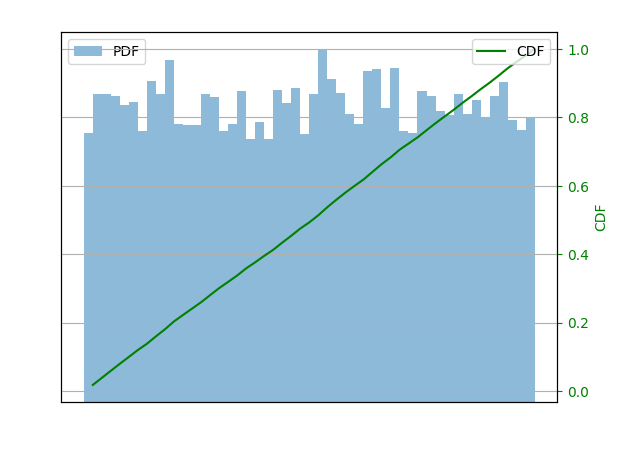

In [29]:
E3 = ProbabilisticEvent("E3", "uniform", {'start': 0, 'end': 1})
plot_probability_distribution(E3.sample(), "Probability of  E3 occuring")

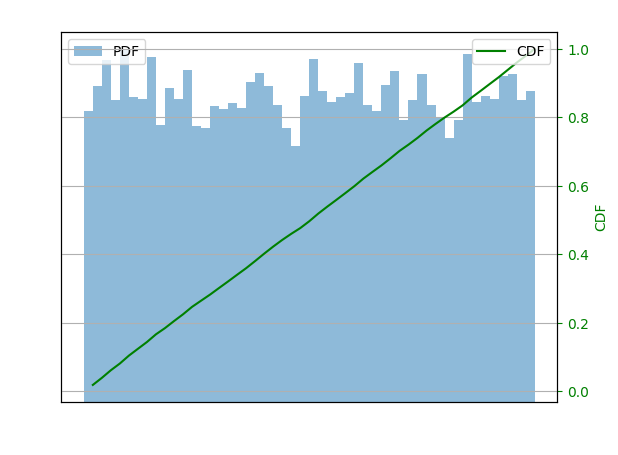

In [30]:
NE3 = E3.complementary_event()
plot_probability_distribution(NE3.sample(), "Probability of event 3 not occuring")


# Step 5: Define utility function 


## Step 5.1: Utility function

In [31]:
def utility_function(samples):
    return 41*samples

# Step 6: Define Decisions and Outcomes

## Step 6.1: Define Decisions

In [32]:
decision1 = Decision("Buying my train ticket")
decision2 = Decision("Not buying my train ticket")

## Step 6.2: Define Outcomes

### Outcome 1: E1&E2&E3

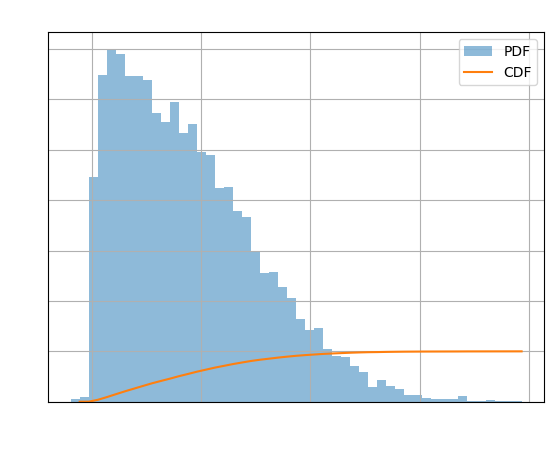

Statistics for Distribution of E1&E2&E3:
  Mean: 0.09
  Median: 0.08
  Standard Deviation: 0.07
  25th percentile: 0.04
  75th percentile: 0.13


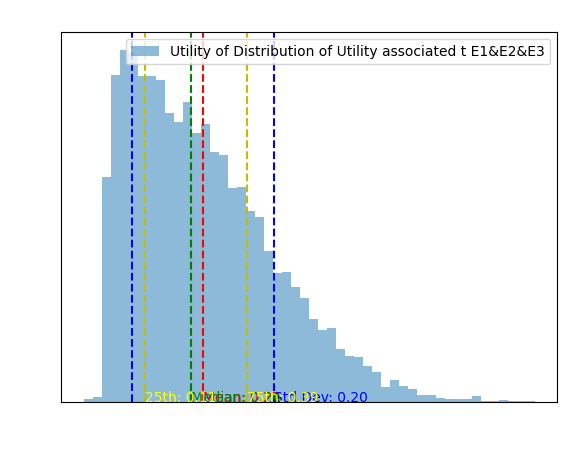

Statistics for Utility of Distribution of Utility associated t E1&E2&E3:
  Mean: 0.27
  Median: 0.24
  Standard Deviation: 0.20
  25th percentile: 0.11
  75th percentile: 0.39


In [33]:
outcome_title = "E1&E2&E3"
def utility_function(samples):
    return 3*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [E1,E2,E3], combine_formula, utility_function)
outcome1=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)



### Outcome2: E1&E3&NE3

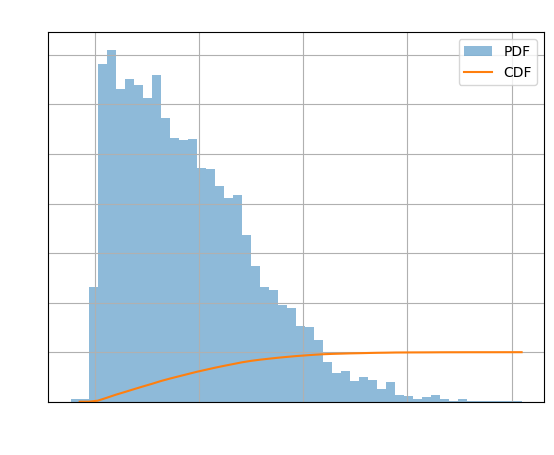

Statistics for Distribution of E1&E3&NE3:
  Mean: 0.09
  Median: 0.08
  Standard Deviation: 0.07
  25th percentile: 0.04
  75th percentile: 0.13


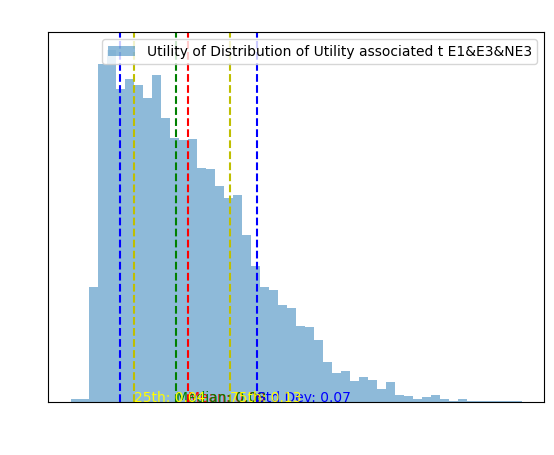

Statistics for Utility of Distribution of Utility associated t E1&E3&NE3:
  Mean: 0.09
  Median: 0.08
  Standard Deviation: 0.07
  25th percentile: 0.04
  75th percentile: 0.13


In [34]:
outcome_title = "E1&E3&NE3"
def utility_function(samples):
    return 1*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title,  decision2, [E1,E2,NE3], combine_formula, utility_function)
outcome2=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)


### Outcome 3: E1&NE2&E3

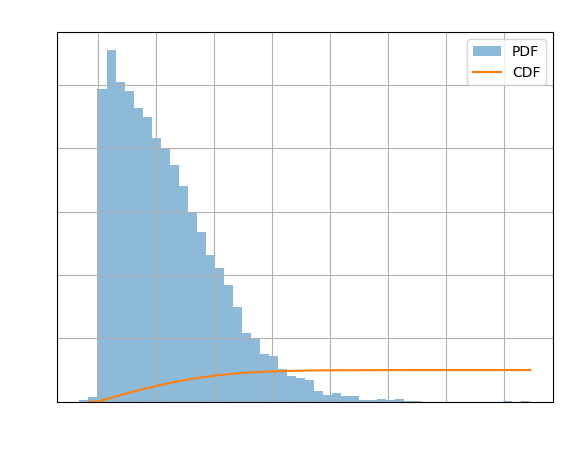

Statistics for Distribution of E1&E3&NE3:
  Mean: 0.06
  Median: 0.05
  Standard Deviation: 0.05
  25th percentile: 0.02
  75th percentile: 0.09


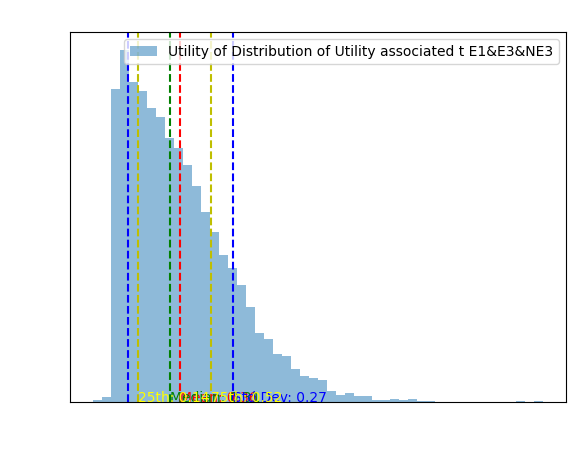

Statistics for Utility of Distribution of Utility associated t E1&E3&NE3:
  Mean: 0.36
  Median: 0.31
  Standard Deviation: 0.27
  25th percentile: 0.14
  75th percentile: 0.52


In [35]:
outcome_title = "E1&E3&NE3"
def utility_function(samples):
    return 6*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [E1,NE2,E3], combine_formula, utility_function)
outcome3=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)


### Outcome 4: E1&NE2&NE3

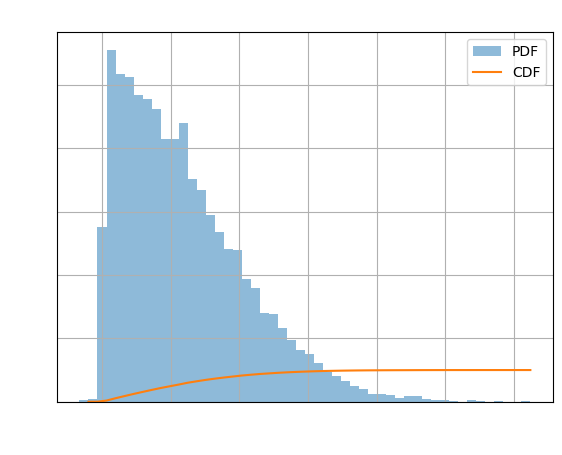

Statistics for Distribution of E1&NE2&NE3:
  Mean: 0.06
  Median: 0.05
  Standard Deviation: 0.05
  25th percentile: 0.02
  75th percentile: 0.09


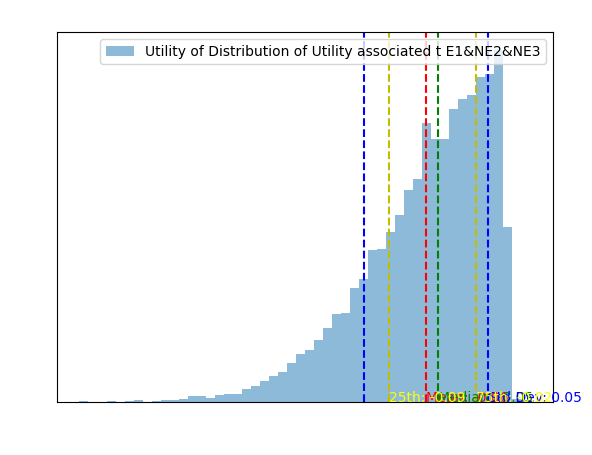

Statistics for Utility of Distribution of Utility associated t E1&NE2&NE3:
  Mean: -0.06
  Median: -0.05
  Standard Deviation: 0.05
  25th percentile: -0.09
  75th percentile: -0.02


In [36]:
outcome_title = "E1&NE2&NE3"
def utility_function(samples):
    return -1*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision2, [E1,NE2,NE3], combine_formula, utility_function)
outcome4=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)

### Outcome 5: NE1&E2&E3

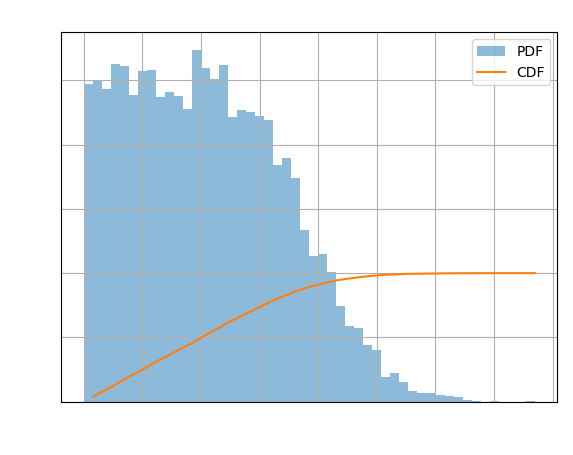

Statistics for Distribution of NE1&E2&E3:
  Mean: 0.21
  Median: 0.20
  Standard Deviation: 0.13
  25th percentile: 0.10
  75th percentile: 0.31


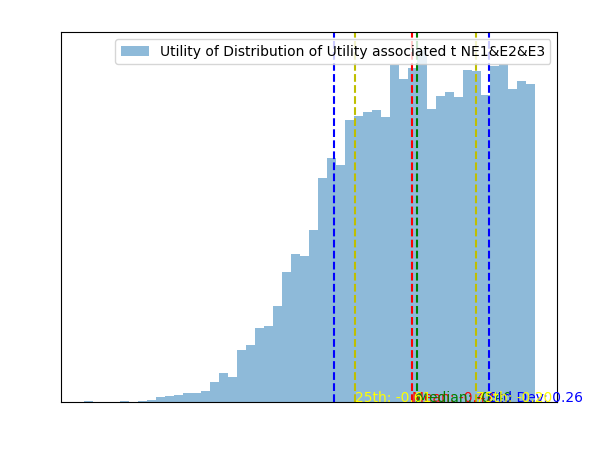

Statistics for Utility of Distribution of Utility associated t NE1&E2&E3:
  Mean: -0.42
  Median: -0.40
  Standard Deviation: 0.26
  25th percentile: -0.61
  75th percentile: -0.20


In [37]:
outcome_title = "NE1&E2&E3"
def utility_function(samples):
    return -2*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [NE1,E2,E3], combine_formula, utility_function)
outcome5=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)

### Outcome 6: NE1&E2&NE3

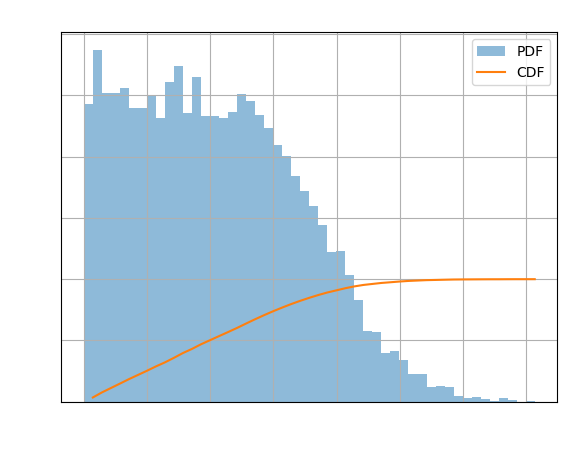

Statistics for Distribution of NE1&E2&NE3:
  Mean: 0.21
  Median: 0.20
  Standard Deviation: 0.13
  25th percentile: 0.10
  75th percentile: 0.31


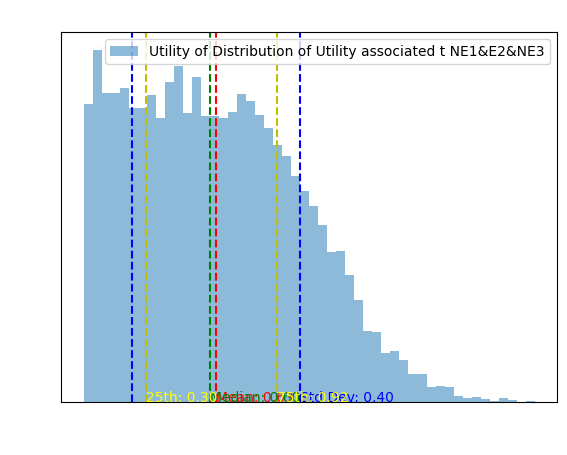

Statistics for Utility of Distribution of Utility associated t NE1&E2&NE3:
  Mean: 0.63
  Median: 0.60
  Standard Deviation: 0.40
  25th percentile: 0.30
  75th percentile: 0.92


In [38]:
outcome_title = "NE1&E2&NE3"
def utility_function(samples):
    return 3*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title,  decision2, [NE1,E2,NE3], combine_formula, utility_function)
outcome6=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)

### Outcome 7: NE1&NE2&E3

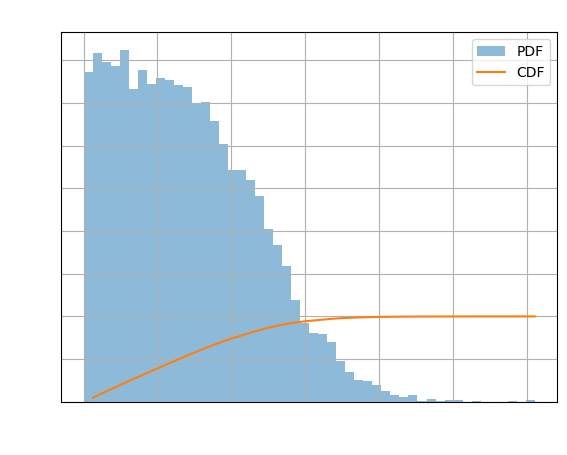

Statistics for Distribution of NE1&NE2&E3:
  Mean: 0.14
  Median: 0.13
  Standard Deviation: 0.09
  25th percentile: 0.06
  75th percentile: 0.20


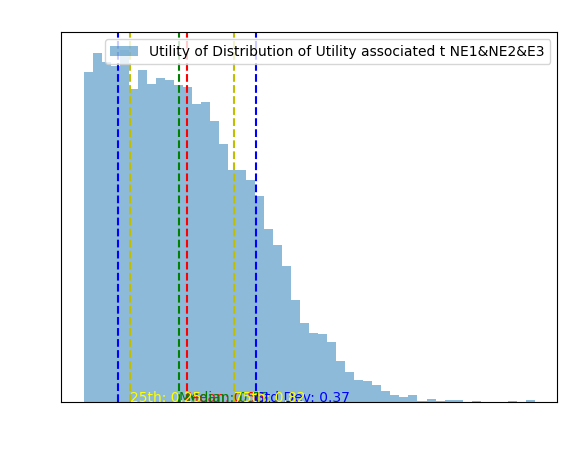

Statistics for Utility of Distribution of Utility associated t NE1&NE2&E3:
  Mean: 0.56
  Median: 0.52
  Standard Deviation: 0.37
  25th percentile: 0.25
  75th percentile: 0.82


In [39]:
outcome_title = "NE1&NE2&E3"
def utility_function(samples):
    return 4*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title, decision1, [NE1,NE2,E3], combine_formula, utility_function)
outcome7=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)

### Outcome 8: NE1&NE2&NE3

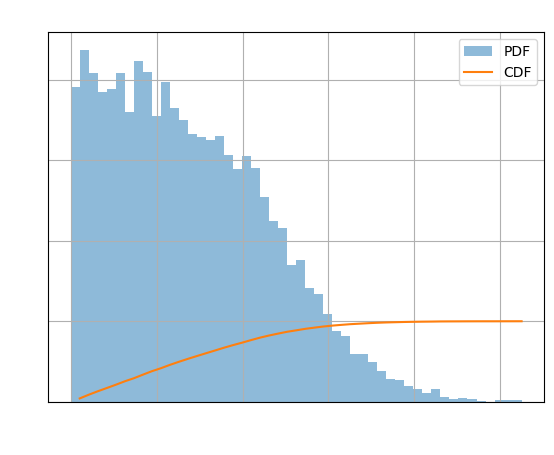

Statistics for Distribution of NE1&NE2&NE3:
  Mean: 0.14
  Median: 0.13
  Standard Deviation: 0.09
  25th percentile: 0.06
  75th percentile: 0.20


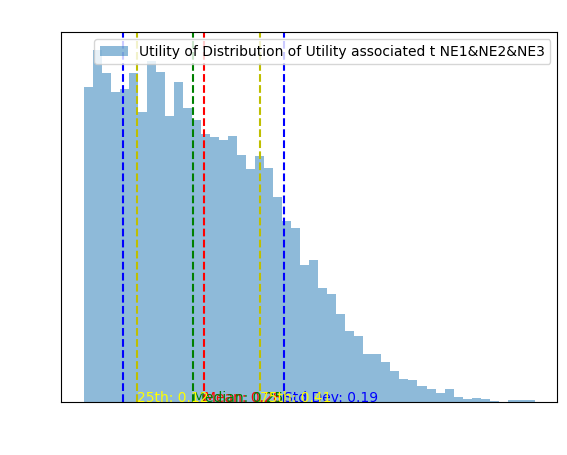

Statistics for Utility of Distribution of Utility associated t NE1&NE2&NE3:
  Mean: 0.28
  Median: 0.25
  Standard Deviation: 0.19
  25th percentile: 0.12
  75th percentile: 0.41


In [40]:
outcome_title = "NE1&NE2&NE3"
def utility_function(samples):
    return 2*samples
def combine_formula(samples1, samples2,samples3):
    return samples1* samples2*samples3


outcome = Outcome(outcome_title,  decision2, [NE1,NE2,NE3], combine_formula, utility_function)
outcome8=outcome
outcome_samples = outcome.generate_samples()
plot_distribution(outcome_samples, "Distribution of "+outcome_title)
plot_utility_distribution(outcome_samples, utility_function, 'Distribution of Utility associated t '+outcome_title)

# Step 7: Evaluate Decisions

In [41]:
all_outcomes = [outcome1, outcome2, outcome3, outcome4, outcome5, outcome6, outcome7, outcome8]

## Decision 1

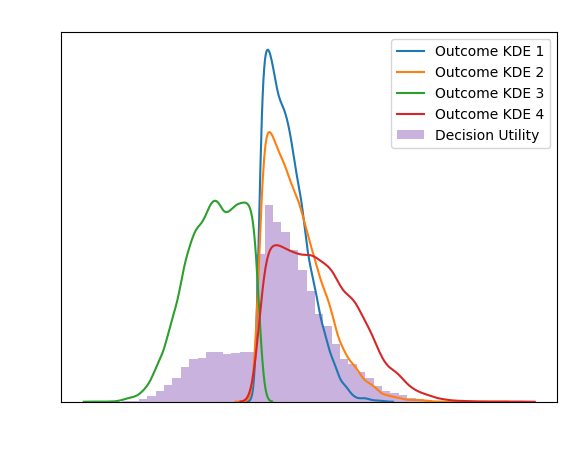

Statistics for Decision Utility for Decision 1:
  Mean: 0.19
  Median: 0.21
  Standard Deviation: 0.46
  25th percentile: -0.00
  75th percentile: 0.47


In [42]:
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision1, all_outcomes)
plot_utility_distribution_decision(final_utilities, weighted_average_utility, all_utility_samples, "Decision 1")

## Decision 2

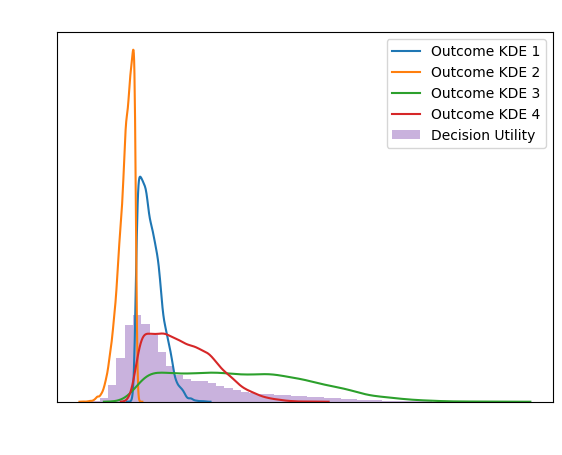

Statistics for Decision Utility for Decision 2:
  Mean: 0.23
  Median: 0.11
  Standard Deviation: 0.34
  25th percentile: 0.00
  75th percentile: 0.37


In [43]:
final_utilities, weighted_average_utility, all_utility_samples = evaluate_decision(decision2, all_outcomes)
plot_utility_distribution_decision(final_utilities,weighted_average_utility, all_utility_samples, "Decision 2")

In [44]:
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Total time elapsed: {elapsed_time:.2f} seconds")

Total time elapsed: 8.80 seconds
